In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv('../data/dataset.csv')

In [3]:
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL,NaN
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE,NaN
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN


In [4]:
columns_to_remove = ['reviewId','score','thumbsUpCount','reviewCreatedVersion','at','replyContent','repliedAt', 'predicted_category','appVersion']

df.drop(columns=columns_to_remove, inplace=True)
df = df.rename(columns={'content': 'review'})

In [5]:
df.head()

,review,sentiment
0,woww,NEUTRAL
1,let me know more details about this,NEUTRAL
2,i've been using this for a while and there's a...,NEGATIVE
3,good,POSITIVE
4,mjkobe,NEUTRAL


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     53043 non-null  object
 1   sentiment  53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [8]:
df.dtypes

review       object
sentiment    object
dtype: object

In [9]:
df['sentiment'].value_counts()

POSITIVE    39982
NEUTRAL      7198
NEGATIVE     5863
Name: sentiment, dtype: int64

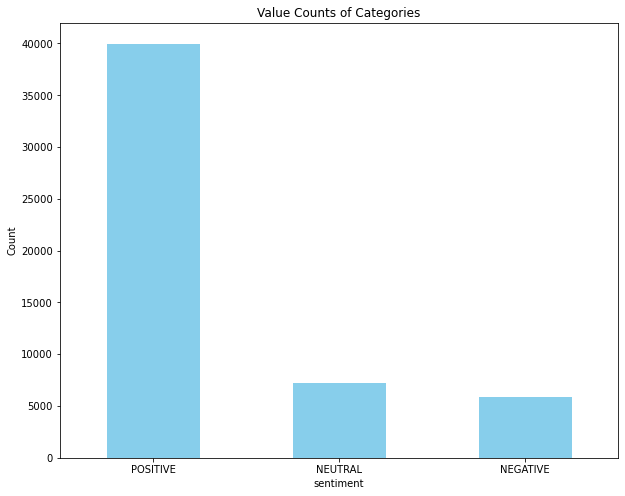

In [10]:
value_counts = df['sentiment'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 8))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of Categories')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Handling the class imbalance of the sentiment using Random Under Sampling 

In [11]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state= 0)
df,df['sentiment']=rus.fit_resample(df[['review']],df['sentiment'])

In [12]:
df['sentiment'].value_counts()

NEGATIVE    5863
NEUTRAL     5863
POSITIVE    5863
Name: sentiment, dtype: int64

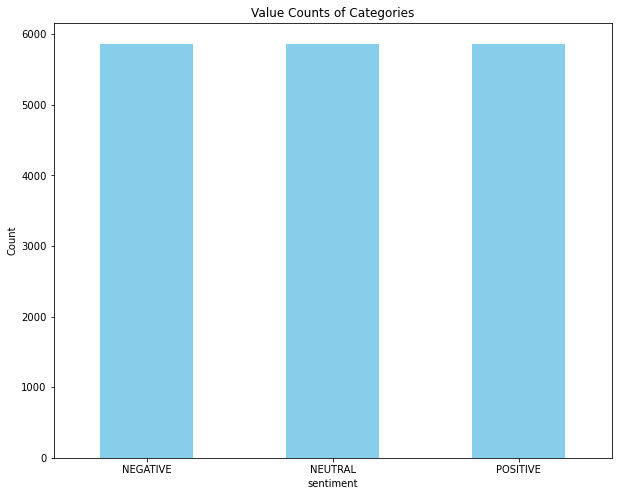

In [13]:
value_counts = df['sentiment'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 8))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of Categories')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Text cleaning

In [14]:
def remove_characters(text):
    return re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', '', text)
df['review'] = df['review'].apply(remove_characters)

### Removing stop words 

In [15]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

df['review'] = df['review'].apply(remove_stopwords)

In [16]:
df

,review,sentiment
2,ive using theres basic bug still fixed scrolli...,NEGATIVE
9,basic search functionality non existent result...,NEGATIVE
26,week daily pick notifications always article i...,NEGATIVE
39,violence golden john fogerty violence oh golde...,NEGATIVE
66,downloaded app intend become medium article wr...,NEGATIVE
...,...,...
13101,point choice topics one place good reads recom...,POSITIVE
37993,pretty good learning,POSITIVE
8423,amazing space read write,POSITIVE
4650,good,POSITIVE
